Recordar que si el árbol es generado por branching process, y etiquetado con markov, entonces la proporción de los nodos converge a la distribucion limite de la cadena de markov.  Ahora la idea es ver que es lo que pasa con la proporción de etiquetas en todos los nodos cuando el árbol se genera y etiqueta con el nuevo modelo.


La idea es generar y etiquetar un grafo con el modelo propuesto (tipo multi-type branching process), ver la distribucion de las etiquetas en los nodos, y ver si se acercan a la distribucion limite de la markov (caso anterior) o a cualquier otra distribucion.

Hago lo siguiente. Defino las etiquetas, y las probabilidades de transicion entre ellas. Tambien defino las distribuciones del numero de hijos para cada tipo. Posteriormente, hago dos grafos etiquetados.

Grafo_bp: Generado con branching process (mismo offspring siempre), etiquetado usando las probabilidades de transicion.

Grafo_mtbp: Generado con la version de multi-type branching process que se ha estado trabajando. Esto es, se genera con branching procces donde se tienen distintos offsprings dependiendo el tipo, y se va etiquetando usando las probabilidades de transicion.

Comparo 5 distribuciones:

1) Proporcion de etiquetas en las hojas del grafo_bp

2) Proporcion de etiquetas en todos los nodos del grafo_bp

3) Distribucion limite de la cadena de markov de las etiquetas

4) Proporcion de etiquetas en las hojas del grafo_mtbp

5) Proporcion de etiquetas en todos los nodos del grafo_mtbp

6) Proporcion convergencia del multi-type branching process.

Ya se habia comprobado que 1) 2) y 3) converguen a lo mismo, la idea es comparar las otras distribuciones con estas.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import scipy

In [2]:
from Funciones_auxiliares import *

### Defino las etiquetas, y las probabilidades de transicion entre ellas. Tambien defino las distribuciones del numero de hijos para cada tipo

In [3]:
etiquetas = ['red', 'blue', 'green']

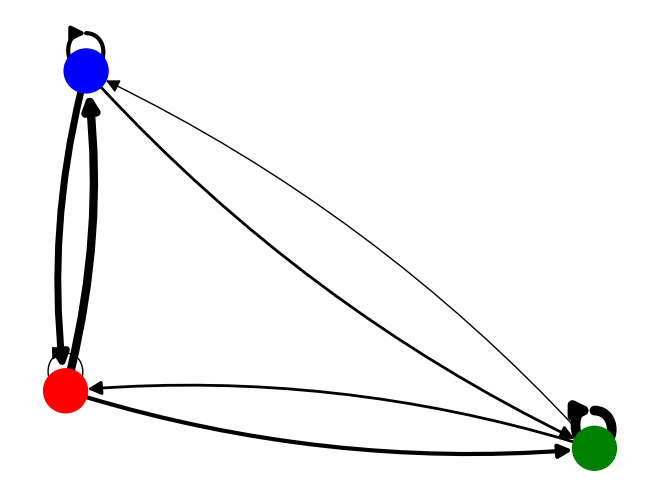

In [4]:
transition_matrix = np.array([[0.1, 0.6, 0.3],
                              [0.5, 0.3, 0.2],
                              [0.2, 0.1, 0.7]])

#transition_matrix = generate_random_transition_matrix(etiquetas)

# comprobar que tenga tantas entradas como etiquetas hay
# matriz cuadrada
assert transition_matrix.shape[0] == transition_matrix.shape[1]
# tenga entradas para todas las etiqueta
assert transition_matrix.shape[0] == len(etiquetas)

# comprobar que es matriz de transicion
assert comprobar_matriz_probabilidad(transition_matrix)

# ver la matriz de transicion
visualize_markov_chain(etiquetas, transition_matrix)

In [5]:
offspring_rojo  = {0:0.0, 1: 0.2, 2: 0.7, 3: 0.1}
offspring_azul  = {0:0.0, 1: 0.7, 2: 0.3, 3: 0.0}
offspring_verde = {0:0.0, 1: 0.1, 2: 0.1, 3: 0.8}

# ponerlas todas en una lista
offspring_distributions = [offspring_rojo,
                          offspring_azul,
                          offspring_verde]

# checar que todas sumen a 1
for offspring in offspring_distributions:
    assert checar_distribucion(offspring)

## Hacer los dos grafos

In [6]:
num_generaciones = 16

**Grafo solo con branching process, despues etiquetar**

In [7]:
# hacer el grafo_bp
grafo_bp, _ = branching_process(numero_de_generaciones = num_generaciones)

# etiquetar el grafo
etiquetar_arbol(grafo_bp, nodo_raiz = 0, indice_etiqueta_raiz = 0, 
                transition_matrix = transition_matrix, etiquetas = etiquetas)

Creando la generacion: 1
	Numero de nodos en esta generacion: 1 
Creando la generacion: 2
	Numero de nodos en esta generacion: 3 
Creando la generacion: 3
	Numero de nodos en esta generacion: 5 
Creando la generacion: 4
	Numero de nodos en esta generacion: 9 
Creando la generacion: 5
	Numero de nodos en esta generacion: 14 
Creando la generacion: 6
	Numero de nodos en esta generacion: 28 
Creando la generacion: 7
	Numero de nodos en esta generacion: 55 
Creando la generacion: 8
	Numero de nodos en esta generacion: 107 
Creando la generacion: 9
	Numero de nodos en esta generacion: 220 
Creando la generacion: 10
	Numero de nodos en esta generacion: 453 
Creando la generacion: 11
	Numero de nodos en esta generacion: 894 
Creando la generacion: 12
	Numero de nodos en esta generacion: 1822 
Creando la generacion: 13
	Numero de nodos en esta generacion: 3662 
Creando la generacion: 14
	Numero de nodos en esta generacion: 7334 
Creando la generacion: 15
	Numero de nodos en esta generacion: 14

In [8]:
print(f"Se tienen {grafo_bp.number_of_nodes()} nodos")
print(f"Se tienen {grafo_bp.number_of_edges()} edges")

Se tienen 58792 nodos
Se tienen 58791 edges


**Grafo con multi-type branching process**

In [9]:
# hacer y etiquetar el grafo_mtbp
grafo_mtbp, _ = generar_arbol_etiquetado(numero_de_generaciones = num_generaciones,
                                     offspring_distributions = offspring_distributions,
                                     transition_matrix = transition_matrix, 
                                     indice_etiqueta_raiz = 2, etiquetas=etiquetas)

Creando y etiquetando la generacion: 1
	Numero de nodos en esta generacion: 3 
Creando y etiquetando la generacion: 2
	Numero de nodos en esta generacion: 3 
Creando y etiquetando la generacion: 3
	Numero de nodos en esta generacion: 8 
Creando y etiquetando la generacion: 4
	Numero de nodos en esta generacion: 19 
Creando y etiquetando la generacion: 5
	Numero de nodos en esta generacion: 39 
Creando y etiquetando la generacion: 6
	Numero de nodos en esta generacion: 86 
Creando y etiquetando la generacion: 7
	Numero de nodos en esta generacion: 195 
Creando y etiquetando la generacion: 8
	Numero de nodos en esta generacion: 442 
Creando y etiquetando la generacion: 9
	Numero de nodos en esta generacion: 983 
Creando y etiquetando la generacion: 10
	Numero de nodos en esta generacion: 2192 
Creando y etiquetando la generacion: 11
	Numero de nodos en esta generacion: 4850 
Creando y etiquetando la generacion: 12
	Numero de nodos en esta generacion: 10638 
Creando y etiquetando la gener

In [10]:
print(f"Se tienen {grafo_mtbp.number_of_nodes()} nodos")
print(f"Se tienen {grafo_mtbp.number_of_edges()} edges")

Se tienen 466597 nodos
Se tienen 466596 edges


## Obtener las distribuciones a comparar

In [11]:
# guardarlas en una lista
distribuciones = []
nombres_distribuciones = []

### 1) Proporcion de etiquetas en las hojas del grafo_bp

In [12]:
# tomar las hojas de este grafo
hojas_bp = [node for node in grafo_bp.nodes() if grafo_bp.out_degree(node) == 0]
print(f"Se tienen {len(hojas_bp)} hojas")

# obtener las etiquetas de las hojas
etiquetas_hojas_bp = np.array([get_etiqueta(hoja, grafo_bp) for hoja in hojas_bp])

# obtener la proporcion de etiquetas en las hojas de este grafo
proporciones_hojas_bp = obtener_proporciones_etiquetas(etiquetas_hojas_bp, etiquetas)

# guardar en las listas
distribuciones.append(proporciones_hojas_bp)
nombres_distribuciones.append("Porporciones hojas grafo_bp")

Se tienen 29505 hojas


### 2) Proporcion de etiquetas en todos los nodos del grafo_bp

In [13]:
# tomar los nodos de este grafo
nodos_bp = grafo_bp.nodes()
print(f"Se tienen {len(nodos_bp)} nodos en el grafo")

# obtener las etiquetas de todos los nodos
etiquetas_full_bp = np.array([get_etiqueta(node, grafo_bp) for node in nodos_bp])

# obtener la proporcion de etiquetas en todos los nodos
proporciones_full_bp = obtener_proporciones_etiquetas(etiquetas_full_bp, etiquetas)

# guardar en las listas
distribuciones.append(proporciones_full_bp)
nombres_distribuciones.append("Porporciones todos los nodos grafo_bp")

Se tienen 58792 nodos en el grafo


###  3) Distribucion limite de la cadena de markov de las etiquetas

In [14]:
# tomar la distribucion limite
distribucion_limite = get_distribucion_limite(transition_matrix)

# guardar en las listas
distribuciones.append(distribucion_limite)
nombres_distribuciones.append("Distribucion limite")

La cadena es irreducible
La cadena es aperiodica


### 4) Proporcion de etiquetas en las hojas del grafo_mtbp

In [15]:
# tomar las hojas de este grafo
hojas_mtbp = [node for node in grafo_mtbp.nodes() if grafo_mtbp.out_degree(node) == 0]
print(f"Se tienen {len(hojas_mtbp)} hojas")

# obtener las etiquetas de las hojas
etiquetas_hojas_mtbp = np.array([get_etiqueta(hoja, grafo_mtbp) for hoja in hojas_mtbp])

# obtener la proporcion de etiquetas en las hojas de este grafo
proporciones_hojas_mtbp = obtener_proporciones_etiquetas(etiquetas_hojas_mtbp, etiquetas)

# guardar en las listas
distribuciones.append(proporciones_hojas_mtbp)
nombres_distribuciones.append("Porporciones hojas grafo_mtbp")

Se tienen 256089 hojas


### 5) Proporcion de etiquetas en todos los nodos del grafo_mtbp

In [16]:
# tomar los nodos de este grafo
nodos_mtbp = grafo_mtbp.nodes()
print(f"Se tienen {len(nodos_mtbp)} nodos en el grafo")

# obtener las etiquetas de todos los nodos
etiquetas_full_mtbp = np.array([get_etiqueta(node, grafo_mtbp) for node in nodos_mtbp])

# obtener la proporcion de etiquetas en todos los nodos
proporciones_full_mtbp = obtener_proporciones_etiquetas(etiquetas_full_mtbp, etiquetas)

# guardar en las listas
distribuciones.append(proporciones_full_mtbp)
nombres_distribuciones.append("Porporciones todos los nodos grafo_mtbp")

Se tienen 466597 nodos en el grafo


### 6) Proporcion convergencia del multi-type branching process

In [17]:
# Definir matrices importantes

# matriz H
vector_H = [esperanza_distribucion(offspring) for offspring in offspring_distributions]
H = np.diag(vector_H)

# Matriz P
P = transition_matrix.T

# Multiplicar
PH = np.dot(P, H)

In [18]:
# obtener (PH)^n
n = 100
PH_n = np.linalg.matrix_power(PH, n)

In [19]:
# obtener las proporciones de las columnas
proporcion_col0 = PH_n[:, 0]/PH_n[:, 0].sum()
proporcion_col1 = PH_n[:, 1]/PH_n[:, 1].sum()
proporcion_col2 = PH_n[:, 2]/PH_n[:, 2].sum()

# ver que son iguales
assert np.isclose(proporcion_col0, proporcion_col1).all()
assert np.isclose(proporcion_col0, proporcion_col2).all()
assert np.isclose(proporcion_col1, proporcion_col2).all()

In [20]:
# la proporcion convergencia es cualquiera de estas

# guardar en las listas
distribuciones.append(proporcion_col1)
nombres_distribuciones.append("Porporcion convergencia")

#### Despues veo que la proporcion convergencia es el vector propio de Perron-Frobenius

In [21]:
proporcion_col1

array([0.21988136, 0.22008719, 0.56003145])

In [25]:
# obtener vectores y valores propios
eigenvalues, eigenvectors = np.linalg.eig(PH)

# ver el indice del valor propio de perro-frobenius
indice_perron = np.argmax(np.abs(eigenvalues))

# tomar el vector propio asociado
vector_propio = eigenvectors[:, indice_perron]

# normalizar para que sean proporciones
proporciones_vector_propio = vector_propio/vector_propio.sum()

proporciones_vector_propio

array([0.21988136, 0.22008719, 0.56003145])

# Comparar

Text(0.5, 1.0, 'Porporcion convergencia')

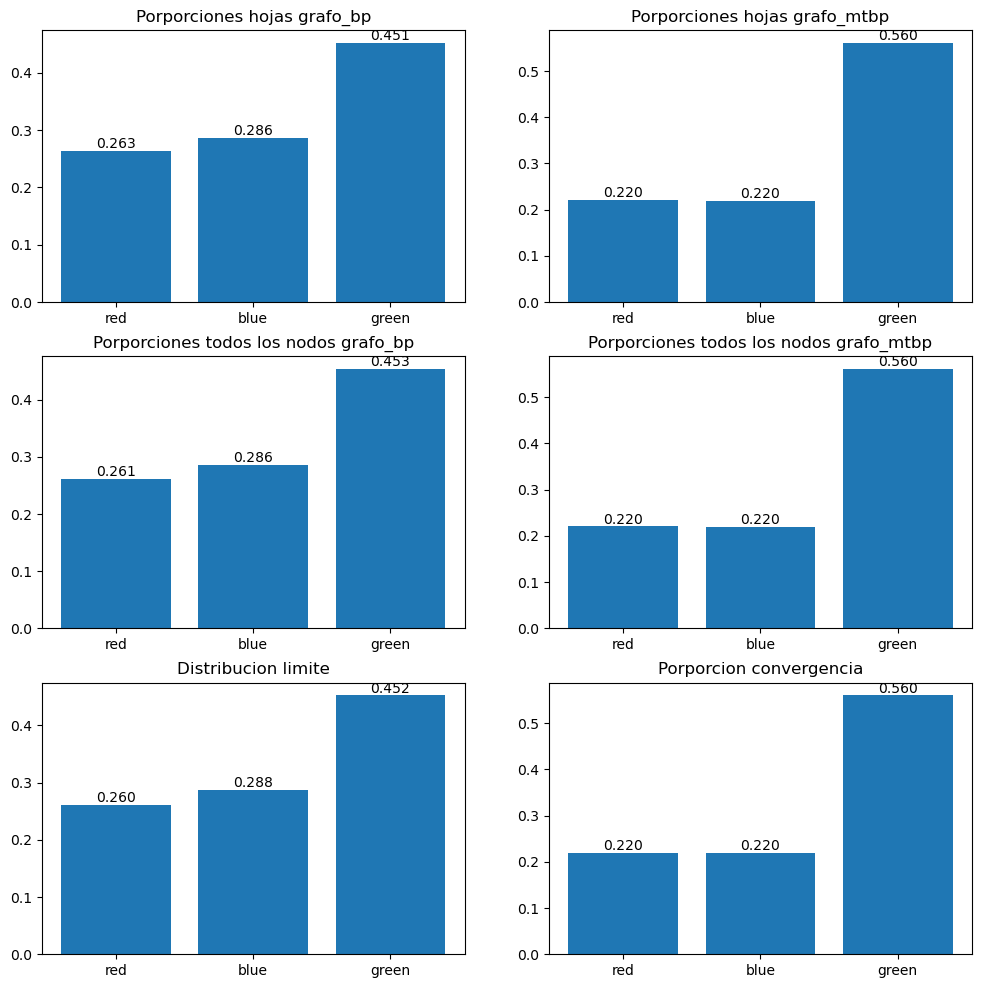

In [22]:
fig, ax = plt.subplots(3, 2, figsize = (12, 12))

# distribucion de las hojas del grafo_bp
plot_distribution(distribuciones[0], ax[0, 0], etiquetas)
ax[0, 0].set_title(nombres_distribuciones[0])

# distribucion de todos los del grafo_bp
plot_distribution(distribuciones[1], ax[1, 0], etiquetas)
ax[1, 0].set_title(nombres_distribuciones[1])

# distribucion limite
plot_distribution(distribuciones[2], ax[2, 0], etiquetas)
ax[2, 0].set_title(nombres_distribuciones[2])

# distribucion de las hojas del grafo_mtbp
plot_distribution(distribuciones[3], ax[0, 1], etiquetas)
ax[0, 1].set_title(nombres_distribuciones[3])

# distribucion de todos los del grafo_mtbp
plot_distribution(distribuciones[4], ax[1, 1], etiquetas)
ax[1, 1].set_title(nombres_distribuciones[4])

# proporcion convergencia
plot_distribution(distribuciones[5], ax[2, 1], etiquetas)
ax[2, 1].set_title(nombres_distribuciones[5])


In [23]:
# calcular la kl_divergence de todos los pares posibles
kl_matrix = np.zeros((6, 6))

# iterar en los pares
for i in range(6):
    for j in range(6):
        # calccular la divergencia del par correspondiente
        kl_matrix[i, j] = KL_divergence(distribuciones[i], distribuciones[j])

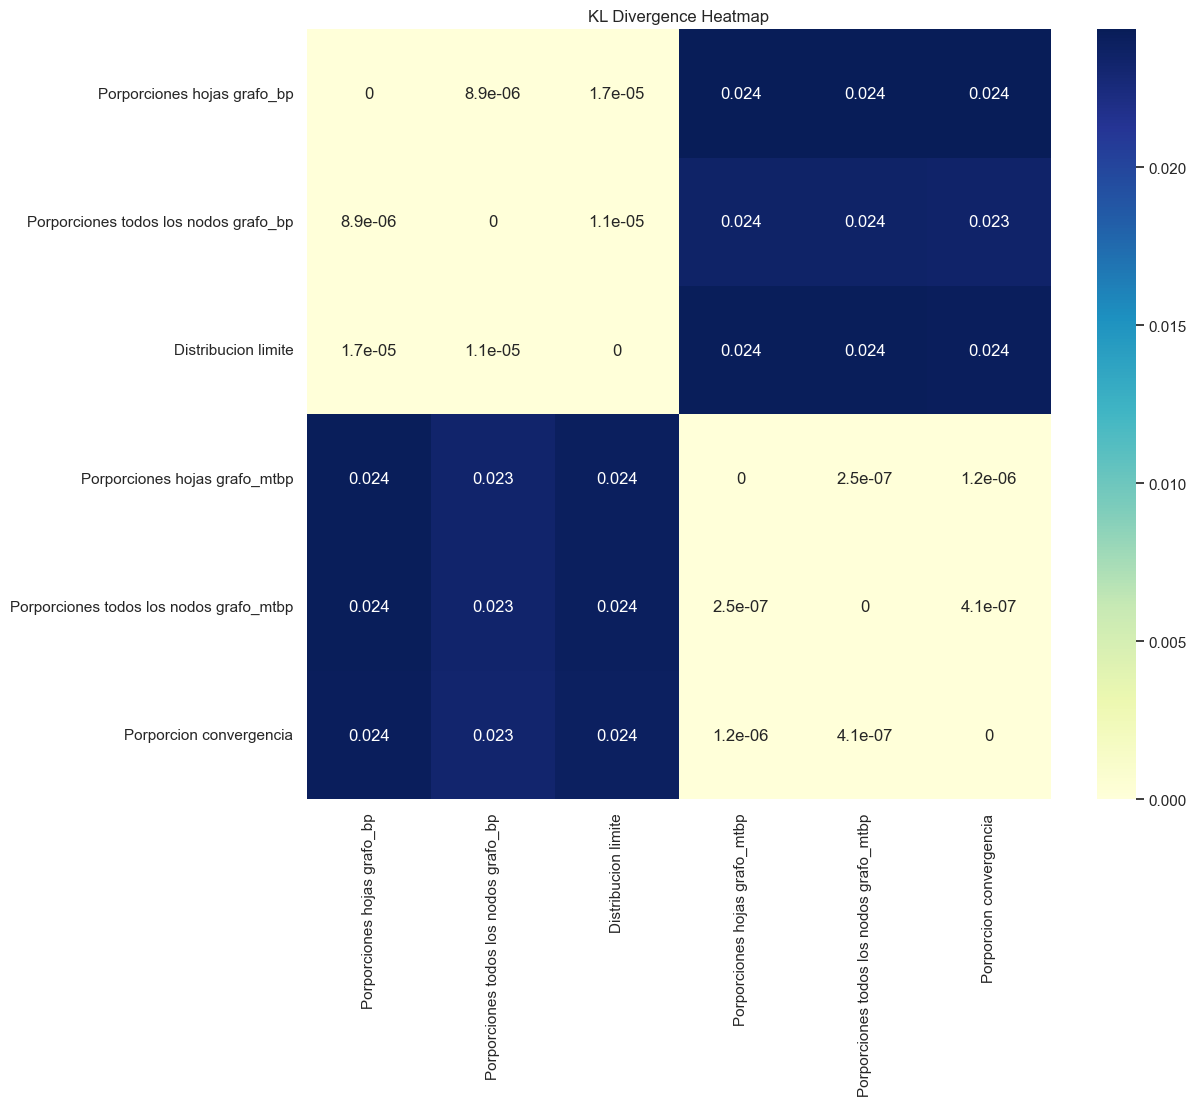

In [24]:
# Hacer un heatmap con esta informacion
sns.set()
plt.figure(figsize=(12, 10))
sns.heatmap(kl_matrix, annot=True, cmap="YlGnBu", 
            xticklabels=nombres_distribuciones, yticklabels=nombres_distribuciones)
plt.title("KL Divergence Heatmap")
plt.show()

Como se esperaba, las primeras 3 distribuciones son super parecidas, sin embargo, las otras 3 no son parecidas a estas. Las distribucion 4 5 y 6 son casi iguales entre ellas.  Lo importante a recalcar es que, con el nuevo modelo, la distribucion limite no modela la proporción de etiquetas en los nodos. Aun mas interesante, la "proporción convergencia" si modela la proporción de etiquetas en los nodos.